# Raw Targets Analysis

This is just a raw preliminary analysis of DOC and TOC to understand if the Berlin case study can be interesting

In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import statsmodels.tsa.seasonal as smt

import scipy.stats as stats

# Define Paths

In [5]:
data_folder = os.path.join("..", "..", "data", "berlin")

raw_data_folder = os.path.join(data_folder, "raw_data")

targets_folder = os.path.join(raw_data_folder, "targets")

# Load Data

In [6]:
# load 305 and 320 targets
doc_toc_305_df = pd.DataFrame()
doc_toc_320_df = pd.DataFrame()

for file in os.listdir(targets_folder):
    if "305" in file:
        df = pd.read_csv(
            os.path.join(targets_folder, file),
            sep=";",
            encoding="unicode_escape",
            header=5,
        )
        doc_toc_305_df = pd.concat([doc_toc_305_df, df])
    elif "320" in file:
        df = pd.read_csv(
            os.path.join(targets_folder, file),
            sep=";",
            encoding="unicode_escape",
            header=5,
        )
        doc_toc_320_df = pd.concat([doc_toc_320_df, df])

In [7]:
doc_toc_305_df

,Messstelle,Messstellennummer,Datum,Parameter,Entnahmetiefe [m],Messmethode,Vorzeichen,Wert,Einheit,Bestimmungsgrenze
0,Oberhavel - Konradshöhe,305,12.04.1994,TOC (Organischer Kohlenstoff),",50",---,NaN,"8,3000",mg/l,NaN
1,Oberhavel - Konradshöhe,305,21.04.1994,TOC (Organischer Kohlenstoff),",50",---,NaN,"9,4000",mg/l,NaN
2,Oberhavel - Konradshöhe,305,03.05.1994,TOC (Organischer Kohlenstoff),",50",---,NaN,"9,1000",mg/l,NaN
3,Oberhavel - Konradshöhe,305,17.05.1994,TOC (Organischer Kohlenstoff),",50",---,NaN,"10,5000",mg/l,NaN
4,Oberhavel - Konradshöhe,305,31.05.1994,TOC (Organischer Kohlenstoff),",50",---,NaN,"8,5000",mg/l,NaN
...,...,...,...,...,...,...,...,...,...,...
631,Oberhavel - Konradshöhe,305,23.10.2023,DOC (Gelöster organischer Kohlenstoff),",50",DIN EN 1484 (H3),NaN,"7,9000",mg/l,"0,3000"
632,Oberhavel - Konradshöhe,305,28.11.2023,DOC (Gelöster organischer Kohlenstoff),",50",DIN EN 1484 (H3),NaN,"8,1000",mg/l,"0,3000"
633,Oberhavel - Konradshöhe,305,02.01.2024,DOC (Gelöster organischer Kohlenstoff),",50",DIN EN 1484 (H3),NaN,"10,0000",mg/l,"0,3000"
634,Oberhavel - Konradshöhe,305,29.01.2024,DOC (Gelöster organischer Kohlenstoff),",50",DIN EN 1484 (H3),NaN,"9,5000",mg/l,"0,3000"


In [8]:
doc_toc_320_df

,Messstelle,Messstellennummer,Datum,Parameter,Entnahmetiefe [m],Messmethode,Vorzeichen,Wert,Einheit,Bestimmungsgrenze
0,Oberhavel - Schleuse Spandau,320,02.08.1976,DOC (Gelöster organischer Kohlenstoff),",50",---,NaN,"10,0000",mg/l,NaN
1,Oberhavel - Schleuse Spandau,320,04.10.1976,DOC (Gelöster organischer Kohlenstoff),",50",---,NaN,"8,8000",mg/l,NaN
2,Oberhavel - Schleuse Spandau,320,06.12.1976,DOC (Gelöster organischer Kohlenstoff),",50",---,NaN,"7,6000",mg/l,NaN
3,Oberhavel - Schleuse Spandau,320,14.02.1977,DOC (Gelöster organischer Kohlenstoff),",50",---,NaN,"6,9000",mg/l,NaN
4,Oberhavel - Schleuse Spandau,320,07.03.1977,DOC (Gelöster organischer Kohlenstoff),",50",---,NaN,"7,2000",mg/l,NaN
...,...,...,...,...,...,...,...,...,...,...
362,Oberhavel - Schleuse Spandau,320,23.10.2023,TOC (Organischer Kohlenstoff),",50",DIN EN 1484 (H3),NaN,"8,6000",mg/l,"1,0000"
363,Oberhavel - Schleuse Spandau,320,28.11.2023,TOC (Organischer Kohlenstoff),",50",DIN EN 1484 (H3),NaN,"8,0000",mg/l,"1,0000"
364,Oberhavel - Schleuse Spandau,320,02.01.2024,TOC (Organischer Kohlenstoff),",50",DIN EN 1484 (H3),NaN,"11,0000",mg/l,"1,0000"
365,Oberhavel - Schleuse Spandau,320,29.01.2024,TOC (Organischer Kohlenstoff),",50",DIN EN 1484 (H3),NaN,"9,5000",mg/l,"1,0000"


# Preprocess Data

## 305

In [9]:
# rename columns
doc_toc_305_df.rename(
    columns={
        "Messstelle": "Station",
        "Messstellennummer": "Station ID",
        "Datum": "Date",
        "Entnahmetiefe [m]": "Sampling Depth [m]",
        "Messmethode": "Method",
        "Vorzeichen": "Sign",
        "Wert": "Value",
        "Einheit": "Unit",
        "Bestimmungsgrenze": "Limit of Quantification",
    },
    inplace=True,
)

In [10]:
# type conversion
doc_toc_305_df["Date"] = pd.to_datetime(
    doc_toc_305_df["Date"], format="%d.%m.%Y", errors="coerce"
)
doc_toc_305_df["Value"] = pd.to_numeric(
    doc_toc_305_df["Value"].str.replace(",", "."), errors="coerce"
)
doc_toc_305_df["Limit of Quantification"] = pd.to_numeric(
    doc_toc_305_df["Limit of Quantification"].str.replace(",", "."),
    errors="coerce",
)
doc_toc_305_df["Sampling Depth [m]"] = pd.to_numeric(
    doc_toc_305_df["Sampling Depth [m]"].str.replace(",", "."),
    errors="coerce",
)

# change parameter names
doc_toc_305_df["Parameter"] = doc_toc_305_df["Parameter"].str.replace(
    "TOC (Organischer Kohlenstoff)", "TOC"
)
doc_toc_305_df["Parameter"] = doc_toc_305_df["Parameter"].str.replace(
    "DOC (Gelöster organischer Kohlenstoff)", "DOC"
)

In [11]:
doc_toc_305_df

,Station,Station ID,Date,Parameter,Sampling Depth [m],Method,Sign,Value,Unit,Limit of Quantification
0,Oberhavel - Konradshöhe,305,1994-04-12,TOC,0.5,---,NaN,8.3,mg/l,NaN
1,Oberhavel - Konradshöhe,305,1994-04-21,TOC,0.5,---,NaN,9.4,mg/l,NaN
2,Oberhavel - Konradshöhe,305,1994-05-03,TOC,0.5,---,NaN,9.1,mg/l,NaN
3,Oberhavel - Konradshöhe,305,1994-05-17,TOC,0.5,---,NaN,10.5,mg/l,NaN
4,Oberhavel - Konradshöhe,305,1994-05-31,TOC,0.5,---,NaN,8.5,mg/l,NaN
...,...,...,...,...,...,...,...,...,...,...
631,Oberhavel - Konradshöhe,305,2023-10-23,DOC,0.5,DIN EN 1484 (H3),NaN,7.9,mg/l,0.3
632,Oberhavel - Konradshöhe,305,2023-11-28,DOC,0.5,DIN EN 1484 (H3),NaN,8.1,mg/l,0.3
633,Oberhavel - Konradshöhe,305,2024-01-02,DOC,0.5,DIN EN 1484 (H3),NaN,10.0,mg/l,0.3
634,Oberhavel - Konradshöhe,305,2024-01-29,DOC,0.5,DIN EN 1484 (H3),NaN,9.5,mg/l,0.3


In [12]:
doc_toc_305_df.isna().sum()

Station                       0
Station ID                    0
Date                          0
Parameter                     0
Sampling Depth [m]            0
Method                        0
Sign                       1090
Value                         0
Unit                          0
Limit of Quantification     877
dtype: int64

### Plot Raw Data

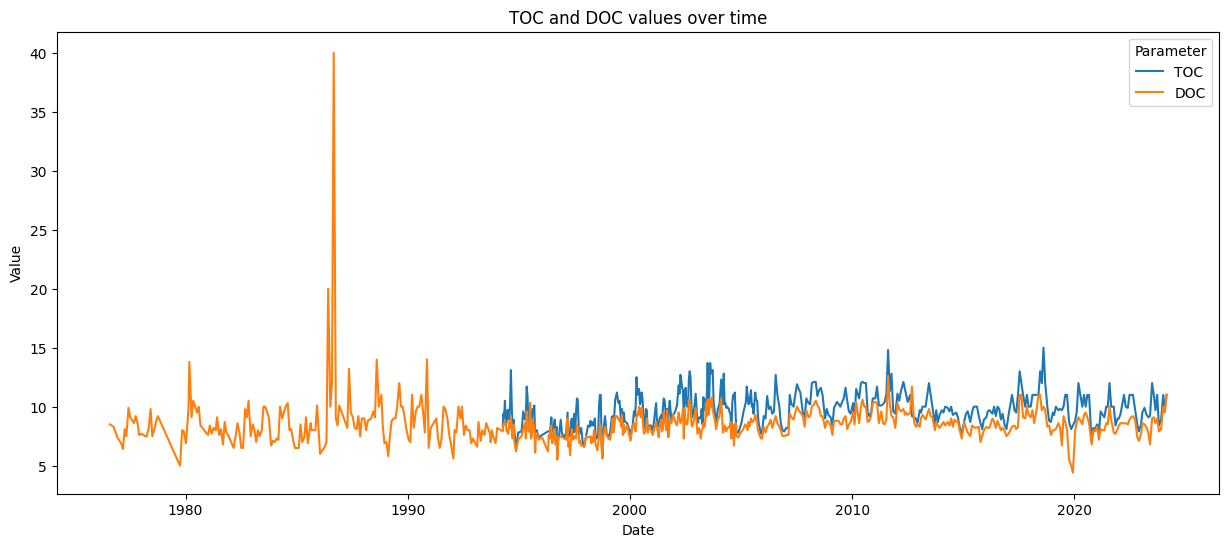

In [13]:
# px.line(doc_toc_305_df, x='Date', y='Value', color='Parameter', title='TOC and DOC values over time')

plt.figure(figsize=(15, 6))
sns.lineplot(data=doc_toc_305_df, x="Date", y="Value", hue="Parameter")
# sns.scatterplot(data=doc_toc_305_df, x='Date', y='Value', hue='Parameter', alpha=0.5)
plt.title("TOC and DOC values over time")
plt.show()

In [14]:
doc_305_df = doc_toc_305_df[doc_toc_305_df["Parameter"] == "DOC"].copy()
toc_305_df = doc_toc_305_df[doc_toc_305_df["Parameter"] == "TOC"].copy()

In [15]:
# remove outliers from doc
doc_305_df = doc_305_df[doc_305_df["Value"] < 16]

### Yearly Average

In [16]:
mean_doc_305_df = doc_305_df.copy()
mean_toc_305_df = toc_305_df.copy()

In [17]:
# perform year by year average and keep the number of samples per year in a different column
mean_doc_305_df["Year"] = mean_doc_305_df["Date"].dt.year
mean_toc_305_df["Year"] = mean_toc_305_df["Date"].dt.year

mean_doc_305_df = (
    mean_doc_305_df.groupby(["Year"])
    .agg({"Value": ["mean", "count"]})
    .reset_index()
)
mean_toc_305_df = (
    mean_toc_305_df.groupby(["Year"])
    .agg({"Value": ["mean", "count"]})
    .reset_index()
)

### Interpolate

In [18]:
doc_305_df.set_index("Date", inplace=True)
toc_305_df.set_index("Date", inplace=True)

In [19]:
# add all dates DOC
all_dates = pd.date_range(
    start=doc_305_df.index.min(), end=doc_305_df.index.max(), freq="D"
)
doc_305_df = doc_305_df.reindex(all_dates, fill_value=None)

doc_305_df.reset_index(inplace=True)

doc_305_df.rename(columns={"index": "Date"}, inplace=True)

doc_305_df["isna"] = doc_305_df["Value"].isna()

In [20]:
doc_305_df.isna().sum()

Date                           0
Station                    16741
Station ID                 16741
Parameter                  16741
Sampling Depth [m]         16741
Method                     16741
Sign                       17375
Value                      16741
Unit                       16741
Limit of Quantification    17269
isna                           0
dtype: int64

In [21]:
n_valid = doc_305_df.shape[0] - doc_305_df["Value"].isna().sum()

print(
    f'Time range of DOC: {doc_305_df["Date"].min()} - {doc_305_df["Date"].max()}'
)
print(f"Number of days with valid DOC values: {n_valid}")

Time range of DOC: 1976-08-02 00:00:00 - 2024-02-26 00:00:00
Number of days with valid DOC values: 634


In [22]:
# add all dates TOC
all_dates = pd.date_range(
    start=toc_305_df.index.min(), end=toc_305_df.index.max(), freq="D"
)
toc_305_df = toc_305_df.reindex(all_dates, fill_value=None)

toc_305_df.reset_index(inplace=True)

toc_305_df.rename(columns={"index": "Date"}, inplace=True)

toc_305_df["isna"] = toc_305_df["Value"].isna()

In [23]:
n_valid = toc_305_df.shape[0] - toc_305_df["Value"].isna().sum()

print(
    f'Time range of TOC: {toc_305_df["Date"].min()} - {toc_305_df["Date"].max()}'
)
print(f"Number of days with valid TOC values: {n_valid}")

Time range of TOC: 1994-04-12 00:00:00 - 2024-02-26 00:00:00
Number of days with valid TOC values: 454


In [24]:
# perform time interpolation of both doc and toc
doc_305_df.set_index("Date", inplace=True)
toc_305_df.set_index("Date", inplace=True)

doc_305_df["Value"] = doc_305_df["Value"].interpolate(method="time")
toc_305_df["Value"] = toc_305_df["Value"].interpolate(method="time")

doc_305_df.reset_index(inplace=True)
toc_305_df.reset_index(inplace=True)

doc_305_df.rename(columns={"index": "Date"}, inplace=True)

toc_305_df.rename(columns={"index": "Date"}, inplace=True)

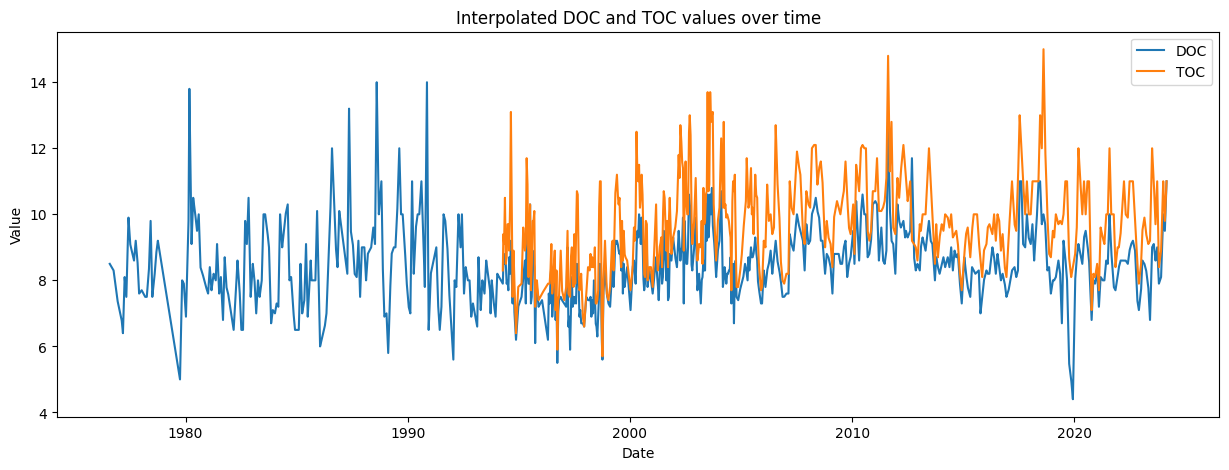

In [25]:
plt.figure(figsize=(15, 5))

sns.lineplot(data=doc_305_df, x="Date", y="Value", label="DOC")
sns.lineplot(data=toc_305_df, x="Date", y="Value", label="TOC")

plt.title("Interpolated DOC and TOC values over time")
plt.show()

## 320

In [26]:
# rename columns
doc_toc_320_df.rename(
    columns={
        "Messstelle": "Station",
        "Messstellennummer": "Station ID",
        "Datum": "Date",
        "Entnahmetiefe [m]": "Sampling Depth [m]",
        "Messmethode": "Method",
        "Vorzeichen": "Sign",
        "Wert": "Value",
        "Einheit": "Unit",
        "Bestimmungsgrenze": "Limit of Quantification",
    },
    inplace=True,
)

In [27]:
# type conversion
doc_toc_320_df["Date"] = pd.to_datetime(
    doc_toc_320_df["Date"], format="%d.%m.%Y", errors="coerce"
)
doc_toc_320_df["Value"] = pd.to_numeric(
    doc_toc_320_df["Value"].str.replace(",", "."), errors="coerce"
)
doc_toc_320_df["Limit of Quantification"] = pd.to_numeric(
    doc_toc_320_df["Limit of Quantification"].str.replace(",", "."),
    errors="coerce",
)
doc_toc_320_df["Sampling Depth [m]"] = pd.to_numeric(
    doc_toc_320_df["Sampling Depth [m]"].str.replace(",", "."),
    errors="coerce",
)

# change parameter names
doc_toc_320_df["Parameter"] = doc_toc_320_df["Parameter"].str.replace(
    "TOC (Organischer Kohlenstoff)", "TOC"
)
doc_toc_320_df["Parameter"] = doc_toc_320_df["Parameter"].str.replace(
    "DOC (Gelöster organischer Kohlenstoff)", "DOC"
)

In [28]:
doc_toc_320_df

,Station,Station ID,Date,Parameter,Sampling Depth [m],Method,Sign,Value,Unit,Limit of Quantification
0,Oberhavel - Schleuse Spandau,320,1976-08-02,DOC,0.5,---,NaN,10.0,mg/l,NaN
1,Oberhavel - Schleuse Spandau,320,1976-10-04,DOC,0.5,---,NaN,8.8,mg/l,NaN
2,Oberhavel - Schleuse Spandau,320,1976-12-06,DOC,0.5,---,NaN,7.6,mg/l,NaN
3,Oberhavel - Schleuse Spandau,320,1977-02-14,DOC,0.5,---,NaN,6.9,mg/l,NaN
4,Oberhavel - Schleuse Spandau,320,1977-03-07,DOC,0.5,---,NaN,7.2,mg/l,NaN
...,...,...,...,...,...,...,...,...,...,...
362,Oberhavel - Schleuse Spandau,320,2023-10-23,TOC,0.5,DIN EN 1484 (H3),NaN,8.6,mg/l,1.0
363,Oberhavel - Schleuse Spandau,320,2023-11-28,TOC,0.5,DIN EN 1484 (H3),NaN,8.0,mg/l,1.0
364,Oberhavel - Schleuse Spandau,320,2024-01-02,TOC,0.5,DIN EN 1484 (H3),NaN,11.0,mg/l,1.0
365,Oberhavel - Schleuse Spandau,320,2024-01-29,TOC,0.5,DIN EN 1484 (H3),NaN,9.5,mg/l,1.0


In [29]:
doc_toc_320_df.isna().sum()

Station                      0
Station ID                   0
Date                         0
Parameter                    0
Sampling Depth [m]           0
Method                       0
Sign                       913
Value                        0
Unit                         0
Limit of Quantification    701
dtype: int64

### Plot Raw Data

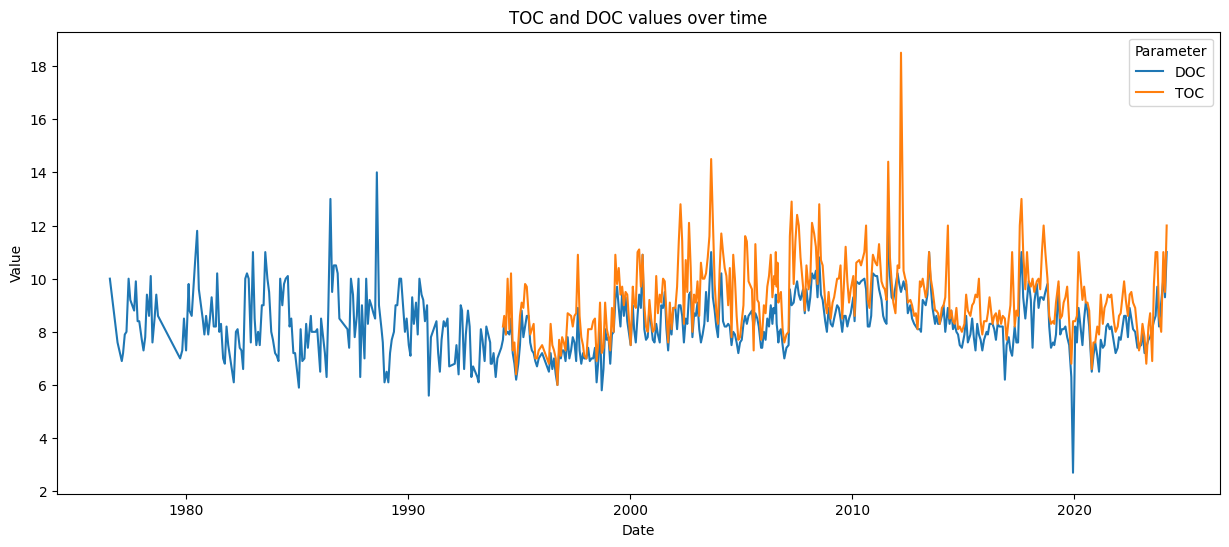

In [30]:
# px.line(doc_toc_320_df, x='Date', y='Value', color='Parameter', title='TOC and DOC values over time')

plt.figure(figsize=(15, 6))
sns.lineplot(data=doc_toc_320_df, x="Date", y="Value", hue="Parameter")
# sns.scatterplot(data=doc_toc_320_df, x='Date', y='Value', hue='Parameter', alpha=0.5)
plt.title("TOC and DOC values over time")
plt.show()

In [31]:
doc_320_df = doc_toc_320_df[doc_toc_320_df["Parameter"] == "DOC"].copy()
toc_320_df = doc_toc_320_df[doc_toc_320_df["Parameter"] == "TOC"].copy()

### Yearly Average

In [32]:
mean_doc_320_df = doc_320_df.copy()
mean_toc_320_df = toc_320_df.copy()

In [33]:
# perform year by year average and keep the number of samples per year in a different column
mean_doc_320_df["Year"] = mean_doc_320_df["Date"].dt.year
mean_toc_320_df["Year"] = mean_toc_320_df["Date"].dt.year

mean_doc_320_df = (
    mean_doc_320_df.groupby(["Year"])
    .agg({"Value": ["mean", "count"]})
    .reset_index()
)
mean_toc_320_df = (
    mean_toc_320_df.groupby(["Year"])
    .agg({"Value": ["mean", "count"]})
    .reset_index()
)

### Interpolate

In [34]:
doc_320_df.set_index("Date", inplace=True)
toc_320_df.set_index("Date", inplace=True)

In [35]:
# add all dates DOC
all_dates = pd.date_range(
    start=doc_320_df.index.min(), end=doc_320_df.index.max(), freq="D"
)
doc_320_df = doc_320_df.reindex(all_dates, fill_value=None)

doc_320_df.reset_index(inplace=True)

doc_320_df.rename(columns={"index": "Date"}, inplace=True)

doc_320_df["isna"] = doc_320_df["Value"].isna()

In [36]:
doc_320_df.isna().sum()

Date                           0
Station                    16829
Station ID                 16829
Parameter                  16829
Sampling Depth [m]         16829
Method                     16829
Sign                       17375
Value                      16829
Unit                       16829
Limit of Quantification    17271
isna                           0
dtype: int64

In [37]:
n_valid = doc_320_df.shape[0] - doc_320_df["Value"].isna().sum()

print(
    f'Time range of DOC: {doc_320_df["Date"].min()} - {doc_320_df["Date"].max()}'
)
print(f"Number of days with valid DOC values: {n_valid}")

Time range of DOC: 1976-08-02 00:00:00 - 2024-02-26 00:00:00
Number of days with valid DOC values: 546


In [38]:
# add all dates TOC
all_dates = pd.date_range(
    start=toc_320_df.index.min(), end=toc_320_df.index.max(), freq="D"
)
toc_320_df = toc_320_df.reindex(all_dates, fill_value=None)

toc_320_df.reset_index(inplace=True)

toc_320_df.rename(columns={"index": "Date"}, inplace=True)

toc_320_df["isna"] = toc_320_df["Value"].isna()

In [39]:
n_valid = toc_320_df.shape[0] - toc_320_df["Value"].isna().sum()

print(
    f'Time range of TOC: {toc_320_df["Date"].min()} - {toc_320_df["Date"].max()}'
)
print(f"Number of days with valid TOC values: {n_valid}")

Time range of TOC: 1994-04-12 00:00:00 - 2024-02-26 00:00:00
Number of days with valid TOC values: 367


In [40]:
# perform time interpolation of both doc and toc
doc_320_df.set_index("Date", inplace=True)
toc_320_df.set_index("Date", inplace=True)

doc_320_df["Value"] = doc_320_df["Value"].interpolate(method="time")
toc_320_df["Value"] = toc_320_df["Value"].interpolate(method="time")

doc_320_df.reset_index(inplace=True)
toc_320_df.reset_index(inplace=True)

doc_320_df.rename(columns={"index": "Date"}, inplace=True)

toc_320_df.rename(columns={"index": "Date"}, inplace=True)

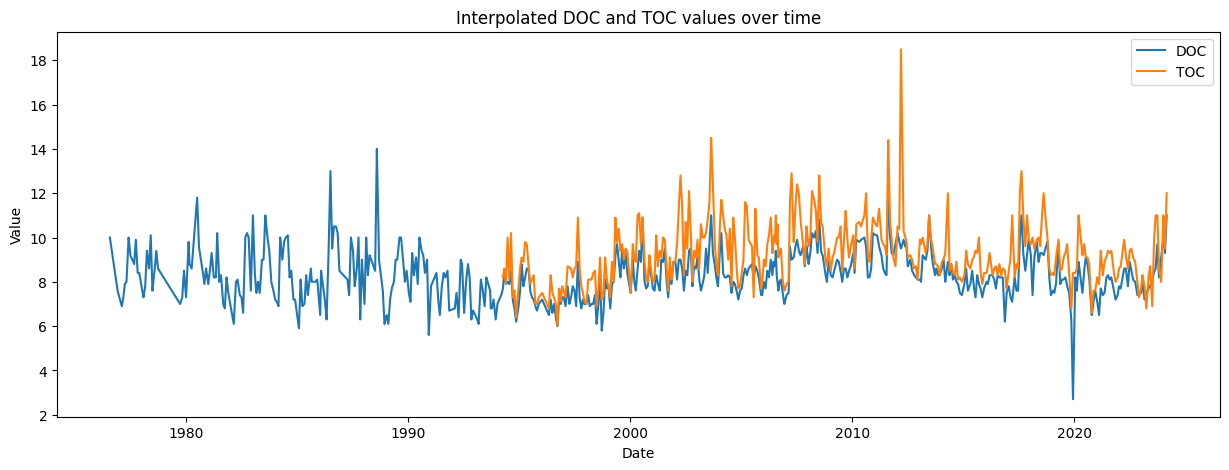

In [41]:
plt.figure(figsize=(15, 5))

sns.lineplot(data=doc_320_df, x="Date", y="Value", label="DOC")
sns.lineplot(data=toc_320_df, x="Date", y="Value", label="TOC")

plt.title("Interpolated DOC and TOC values over time")
plt.show()

# Trend Analysis

## Yearly Data

### DOC

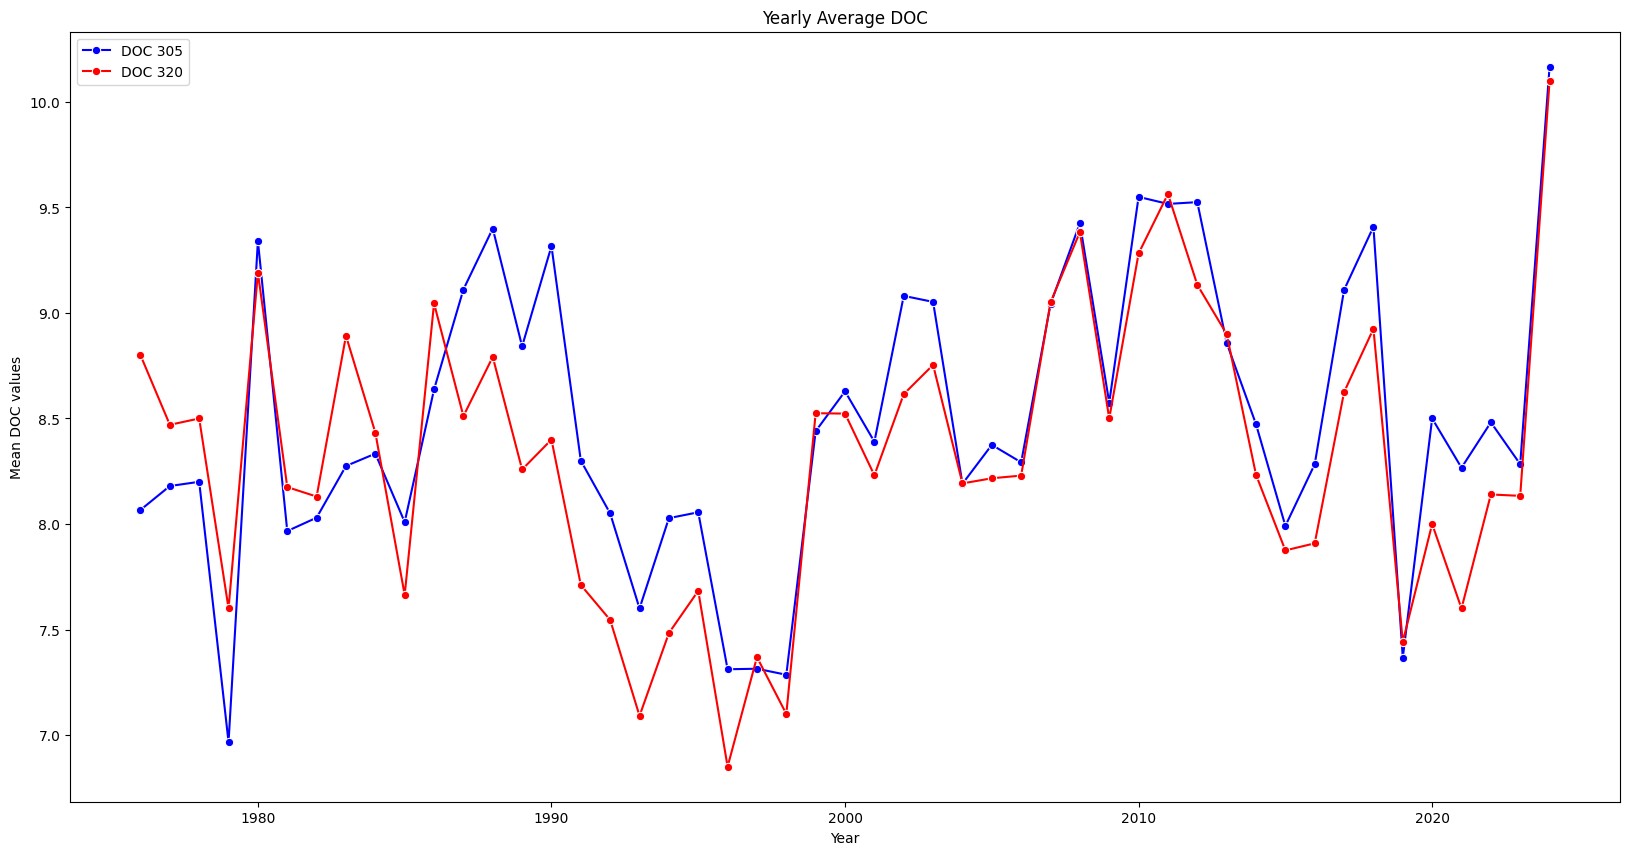

In [42]:
plt.figure(figsize=(20, 10))

sns.lineplot(
    data=mean_doc_305_df,
    x="Year",
    y=("Value", "mean"),
    label="DOC 305",
    color="blue",
    marker="o",
)
sns.lineplot(
    mean_doc_320_df,
    x="Year",
    y=("Value", "mean"),
    label="DOC 320",
    color="red",
    marker="o",
)

plt.xlabel("Year")
plt.ylabel("Mean DOC values")

plt.title("Yearly Average DOC")
plt.show()

In [43]:
pears_, pvalue = stats.pearsonr(
    mean_doc_305_df[("Value", "mean")],
    mean_doc_320_df[("Value", "mean")],
)

print(f"Pearson correlation between DOC 305 and DOC 320: {pears_}")
print(f"P-value: {pvalue}")

Pearson correlation between DOC 305 and DOC 320: 0.8651600380652675
P-value: 1.0867257042069924e-15


In [44]:
mean_doc_305_df["Date"] = pd.to_datetime(
    mean_doc_305_df["Year"], format="%Y"
)
mean_doc_320_df["Date"] = pd.to_datetime(
    mean_doc_320_df["Year"], format="%Y"
)

mean_doc_305_df.set_index("Date", inplace=True)
mean_doc_320_df.set_index("Date", inplace=True)

In [45]:
# compute moving average
result_305 = smt.seasonal_decompose(
    mean_doc_305_df[("Value", "mean")], model="additive", period=2
)
result_320 = smt.seasonal_decompose(
    mean_doc_320_df[("Value", "mean")], model="additive", period=2
)

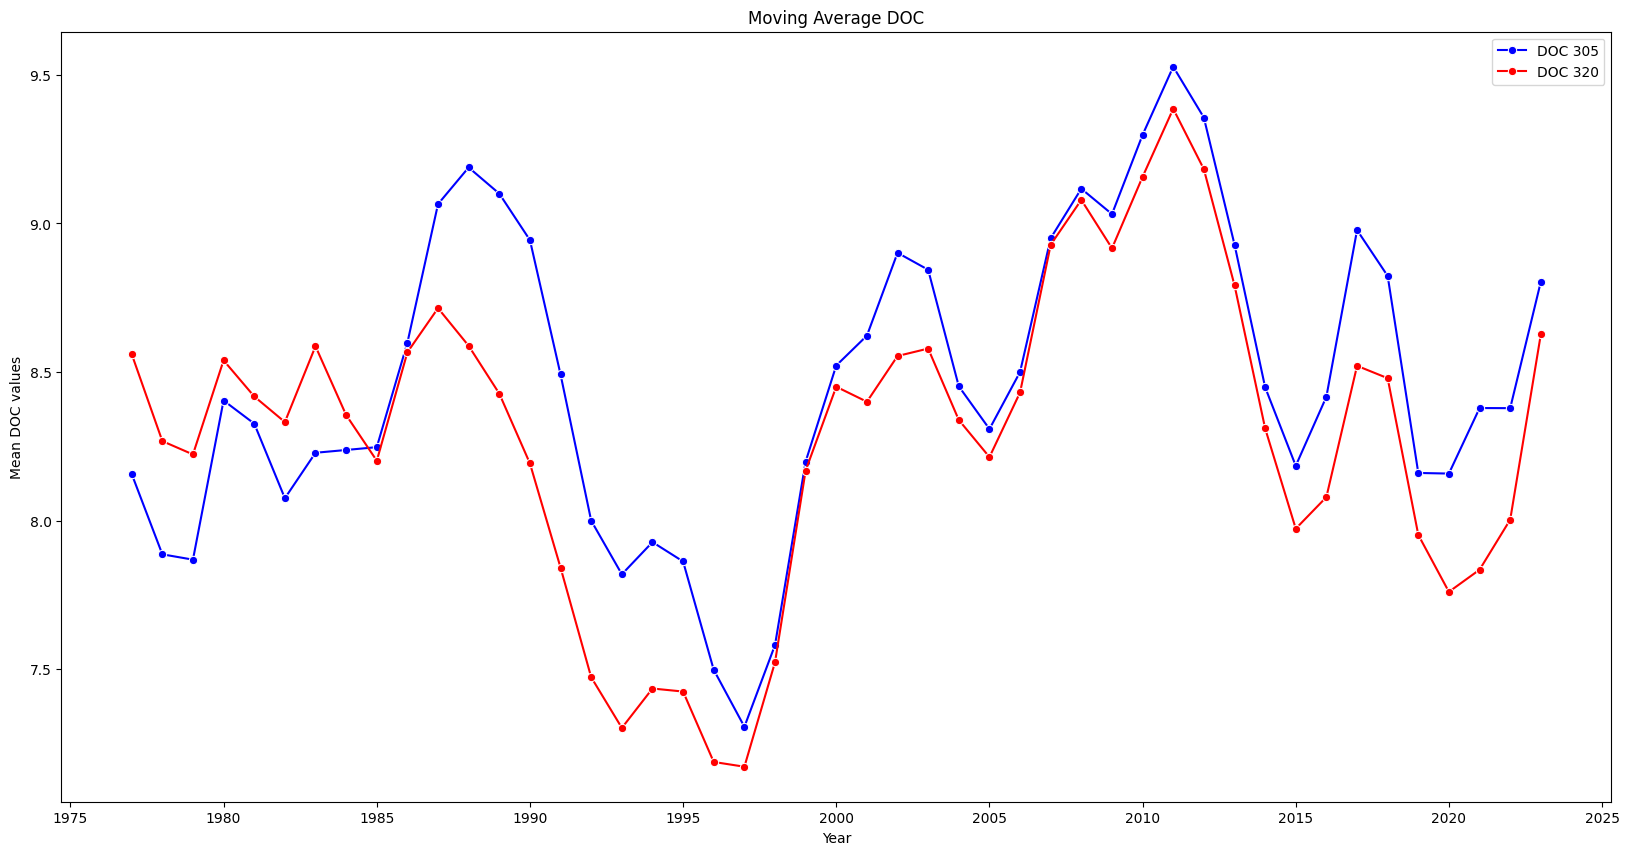

In [46]:
plt.figure(figsize=(20, 10))

sns.lineplot(
    x=result_305.trend.index,
    y=result_305.trend,
    label="DOC 305",
    color="blue",
    marker="o",
)

sns.lineplot(
    x=result_320.trend.index,
    y=result_320.trend,
    label="DOC 320",
    color="red",
    marker="o",
)


plt.xlabel("Year")
plt.ylabel("Mean DOC values")

plt.title("Moving Average DOC")

plt.legend()
plt.show()

### TOC

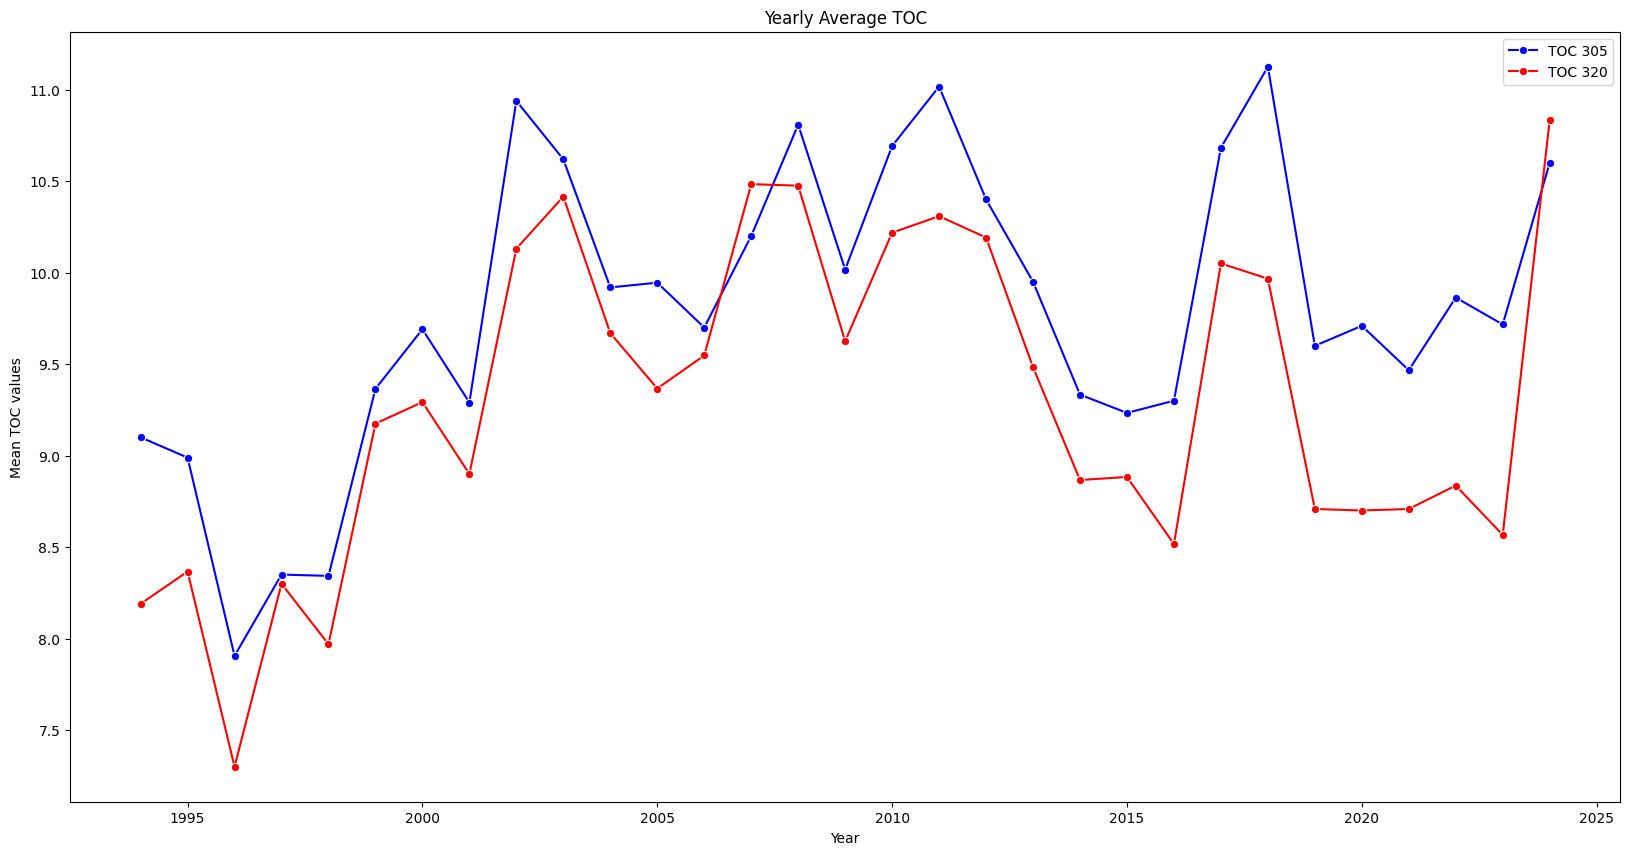

In [47]:
plt.figure(figsize=(20, 10))

sns.lineplot(
    data=mean_toc_305_df,
    x="Year",
    y=("Value", "mean"),
    label="TOC 305",
    color="blue",
    marker="o",
)
sns.lineplot(
    mean_toc_320_df,
    x="Year",
    y=("Value", "mean"),
    label="TOC 320",
    color="red",
    marker="o",
)

plt.xlabel("Year")
plt.ylabel("Mean TOC values")

plt.title("Yearly Average TOC")
plt.show()

In [48]:
pears_, pvalue = stats.pearsonr(
    mean_toc_305_df[("Value", "mean")],
    mean_toc_320_df[("Value", "mean")],
)

print(f"Pearson correlation between TOC 305 and TOC 320: {pears_}")
print(f"P-value: {pvalue}")

Pearson correlation between TOC 305 and TOC 320: 0.9096514754125291
P-value: 1.3801811740078281e-12


In [49]:
mean_toc_305_df["Date"] = pd.to_datetime(
    mean_toc_305_df["Year"], format="%Y"
)
mean_toc_320_df["Date"] = pd.to_datetime(
    mean_toc_320_df["Year"], format="%Y"
)

mean_toc_305_df.set_index("Date", inplace=True)
mean_toc_320_df.set_index("Date", inplace=True)

In [50]:
# compute moving average
result_305 = smt.seasonal_decompose(
    mean_toc_305_df[("Value", "mean")], model="additive", period=2
)
result_320 = smt.seasonal_decompose(
    mean_toc_320_df[("Value", "mean")], model="additive", period=2
)

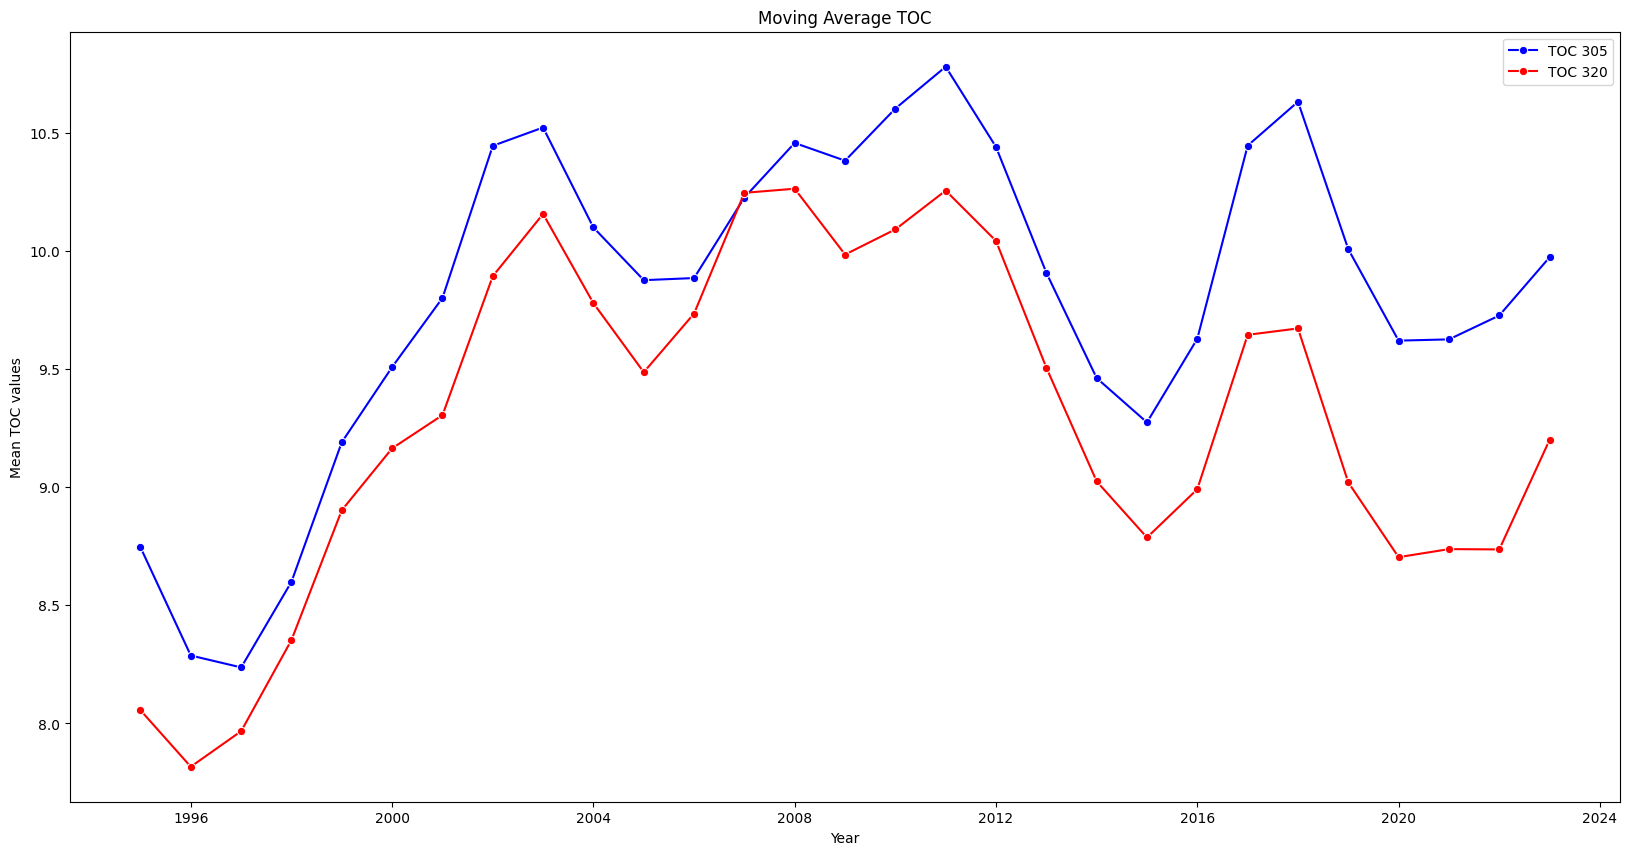

In [51]:
plt.figure(figsize=(20, 10))

sns.lineplot(
    x=result_305.trend.index,
    y=result_305.trend,
    label="TOC 305",
    color="blue",
    marker="o",
)

sns.lineplot(
    x=result_320.trend.index,
    y=result_320.trend,
    label="TOC 320",
    color="red",
    marker="o",
)


plt.xlabel("Year")
plt.ylabel("Mean TOC values")

plt.title("Moving Average TOC")

plt.legend()
plt.show()

### Compare DOC/TOC Same Station

#### 305

In [52]:
mean_doc_305_df.rename(columns={"Value": "DOC"}, inplace=True)

mean_toc_305_df.rename(columns={"Value": "TOC"}, inplace=True)

In [53]:
mean_305_df = mean_doc_305_df.merge(
    mean_toc_305_df, on="Year", how="outer"
)

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_12389/482864053.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  mean_305_df = mean_doc_305_df.merge(


In [54]:
# flat the multiindex
mean_305_df.columns = ["Year", "DOC", "DOC Count", "TOC", "TOC Count"]

In [55]:
mean_305_df

,Year,DOC,DOC Count,TOC,TOC Count
0,1976,8.066667,3,NaN,NaN
1,1977,8.180000,10,NaN,NaN
2,1978,8.200000,10,NaN,NaN
3,1979,6.966667,3,NaN,NaN
4,1980,9.341667,12,NaN,NaN
5,1981,7.966667,12,NaN,NaN
6,1982,8.030000,10,NaN,NaN
7,1983,8.275000,12,NaN,NaN
8,1984,8.333333,12,NaN,NaN
9,1985,8.009091,11,NaN,NaN


In [56]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=mean_305_df["Year"],
        y=mean_305_df["DOC"],
        mode="lines+markers",
        name="DOC",
        line=dict(color="blue"),
    )
)

fig.add_trace(
    go.Scatter(
        x=mean_305_df["Year"],
        y=mean_305_df["TOC"],
        mode="lines+markers",
        name="TOC",
        line=dict(color="red"),
    )
)

fig.update_layout(
    title={
        "text": "Yearly Average DOC and TOC 305",
        "x": 0.5,
        "xanchor": "center",
    },
    xaxis_title="Year",
    yaxis_title="Mean Value",
    legend_title="Parameter",
)

fig.show()

##### Compute Correlation

In [57]:
mean_305_df = mean_doc_305_df.merge(
    mean_toc_305_df, on="Year", how="inner"
)

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_12389/1898800592.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [58]:
# flat the multiindex
mean_305_df.columns = ["Year", "DOC", "DOC Count", "TOC", "TOC Count"]

In [59]:
pears_, pvalue = stats.pearsonr(mean_305_df["DOC"], mean_305_df["TOC"])

print(f"Pearson correlation between DOC and TOC 305: {pears_}")
print(f"P-value: {pvalue}")

Pearson correlation between DOC and TOC 305: 0.8839839295658368
P-value: 4.373673650327528e-11


#### 320

In [60]:
mean_doc_320_df.rename(columns={"Value": "DOC"}, inplace=True)

mean_toc_320_df.rename(columns={"Value": "TOC"}, inplace=True)

In [61]:
mean_320_df = mean_doc_320_df.merge(
    mean_toc_320_df, on="Year", how="outer"
)

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_12389/1042723045.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [62]:
# flat the multiindex
mean_320_df.columns = ["Year", "DOC", "DOC Count", "TOC", "TOC Count"]

In [63]:
mean_320_df

,Year,DOC,DOC Count,TOC,TOC Count
0,1976,8.800000,3,NaN,NaN
1,1977,8.470000,10,NaN,NaN
2,1978,8.500000,10,NaN,NaN
3,1979,7.600000,3,NaN,NaN
4,1980,9.190909,11,NaN,NaN
5,1981,8.175000,12,NaN,NaN
6,1982,8.130000,10,NaN,NaN
7,1983,8.891667,12,NaN,NaN
8,1984,8.433333,12,NaN,NaN
9,1985,7.663636,11,NaN,NaN


In [64]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=mean_320_df["Year"],
        y=mean_320_df["DOC"],
        mode="lines+markers",
        name="DOC",
        line=dict(color="blue"),
    )
)

fig.add_trace(
    go.Scatter(
        x=mean_320_df["Year"],
        y=mean_320_df["TOC"],
        mode="lines+markers",
        name="TOC",
        line=dict(color="red"),
    )
)

fig.update_layout(
    title={
        "text": "Yearly Average DOC and TOC 320",
        "x": 0.5,
        "xanchor": "center",
    },
    xaxis_title="Year",
    yaxis_title="Mean Value",
    legend_title="Parameter",
)

fig.show()

##### Compute Correlation

In [65]:
mean_320_df = mean_doc_320_df.merge(
    mean_toc_320_df, on="Year", how="inner"
)

/var/folders/z5/plf0_b5s39nb0_gctbxmpndc0000gn/T/ipykernel_12389/789814628.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [66]:
# flat the multiindex
mean_320_df.columns = ["Year", "DOC", "DOC Count", "TOC", "TOC Count"]

In [67]:
pears_, pvalue = stats.pearsonr(mean_320_df["DOC"], mean_320_df["TOC"])

print(f"Pearson correlation between DOC and TOC 320: {pears_}")
print(f"P-value: {pvalue}")

Pearson correlation between DOC and TOC 320: 0.9266390068744798
P-value: 7.527651558221486e-14


## Interpolated Data

### DOC

In [68]:
# take only date and value
ts_doc_305_df = doc_305_df[["Date", "Value"]].copy()
ts_doc_320_df = doc_320_df[["Date", "Value"]].copy()

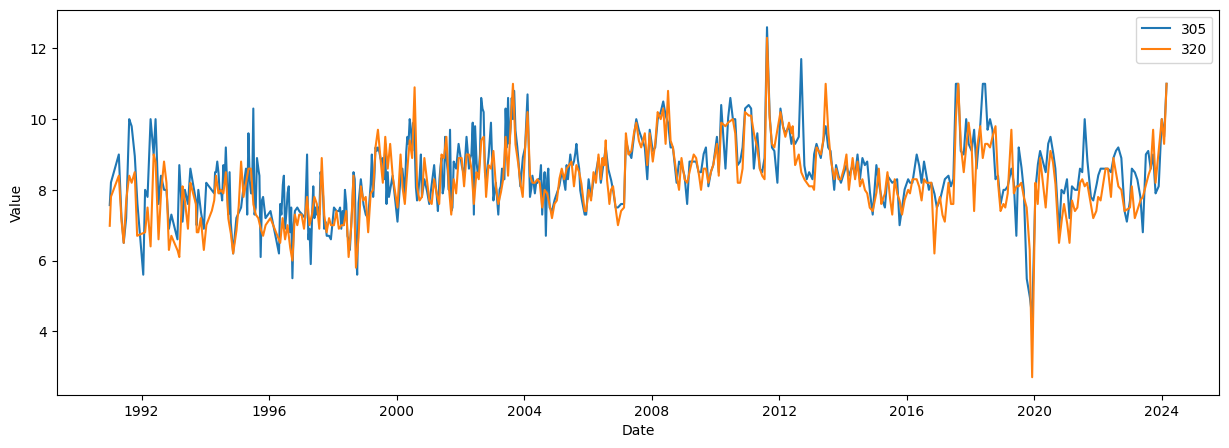

In [69]:
plt.figure(figsize=(15, 5))
sns.lineplot(
    data=ts_doc_305_df[ts_doc_305_df["Date"].dt.year > 1990],
    x="Date",
    y="Value",
    label="305",
)
sns.lineplot(
    data=ts_doc_320_df[ts_doc_320_df["Date"].dt.year > 1990],
    x="Date",
    y="Value",
    label="320",
)

plt.show()

In [70]:
result_305 = smt.STL(ts_doc_305_df.set_index("Date"), period=365).fit()
result_320 = smt.STL(ts_doc_320_df.set_index("Date"), period=365).fit()

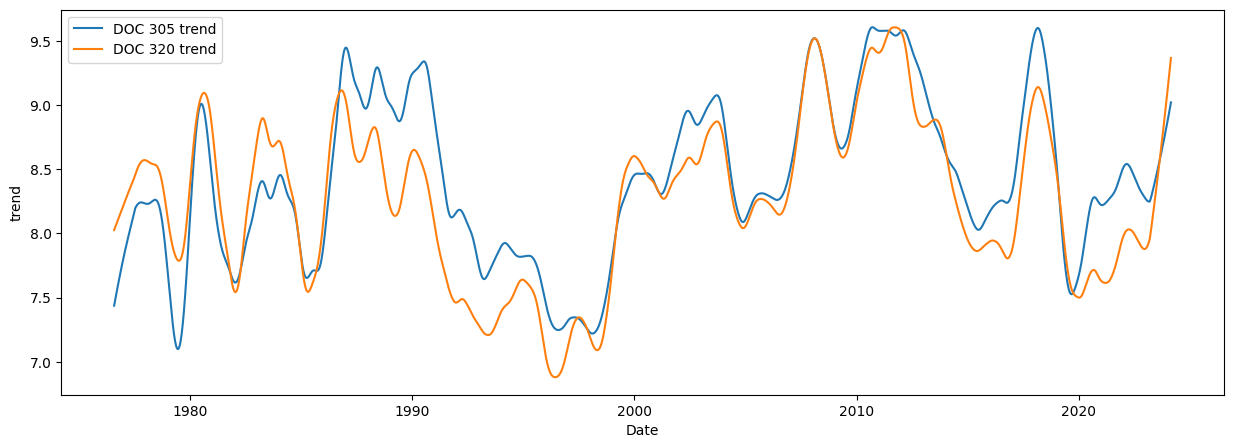

In [71]:
# plot the results
plt.figure(figsize=(15, 5))

sns.lineplot(data=result_305.trend, label="DOC 305 trend")
sns.lineplot(data=result_320.trend, label="DOC 320 trend")

plt.show()

### TOC

In [72]:
# take only date and value
ts_toc_305_df = toc_305_df[["Date", "Value"]].copy()
ts_toc_320_df = toc_320_df[["Date", "Value"]].copy()

In [73]:
result_305 = smt.STL(ts_toc_305_df.set_index("Date"), period=365).fit()
result_320 = smt.STL(ts_toc_320_df.set_index("Date"), period=365).fit()

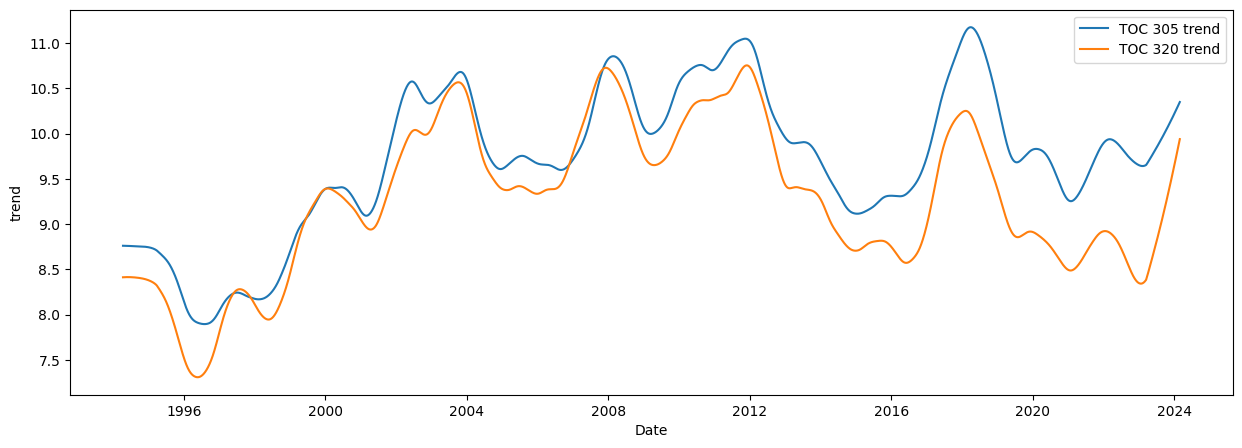

In [74]:
# plot the results
plt.figure(figsize=(15, 5))

sns.lineplot(data=result_305.trend, label="TOC 305 trend")
sns.lineplot(data=result_320.trend, label="TOC 320 trend")

plt.show()

# Load Ground Water Data